<p><img alt="Twitter logo" height= 80px" src='https:////drive.google.com/uc?id=1dn0JeJfzplNKA8b5JoEa4fQWZxT3dXNY' class="center"></p>


# Twitter Sentiment Analysis
                                      
## Problem Statement:

Implement a sentiment analysis/classification, which involves monitoring emotions in conversations on the Twitter social media platform. Twitter seeks to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in their base of 330 million monthly active users. 

Twitter seeks to specifically understand what is going on within the U.S. Airline industry. 
Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
## Views: 
This is an important step for the airline industry as customer sentiment is critical due to the industry disruptions across the United States. A trend of tweets, either positive or negative, could be used to change public opinion of the airlines or the relative safety of the industry. 
 
### Dataset: 
The dataset has the following columns:

•	tweet_id                                                           
•	airline_sentiment                                               
•	airline_sentiment_confidence                               
•	negativereason                                                   
•	negativereason_confidence                                    
•airline                                                                  
•	airline_sentiment_gold                                              
•	name     
•	negativereason_gold  
•	retweet_count 

•	text

•	tweet_coord
•	tweet_created
•	tweet_location 
•	user_timezone

### Approach method: 
#### 1.	Step: Preparation
a.	Describe each step in well-commented code

b.	Add your view and opinion along with the problem statement

c.	Import the libraries

d.	load dataset
#### 2.	Step: Pre-process text 
a.	Print the shape of the data

b.	Summarize the data in a description

c.	Describe understanding of data columns

d.	Drop all other columns except “text” and “airline_sentiment”

e.	Check the shape of the data

f.	Print the first 5 rows of data
#### 3.	Step: Pre - Processing
a.	Each text pre-processing step should be mentioned in the notebook separately

b.	Remove HTML tags

c.	Tokenization

d.	Remove the numbers

e.	Removal of Special Characters and Punctuations

f.	Removal of stopwords

g.	Conversion to lowercase

h.	Lemmatize or stemming

i.	Join the words in the list to convert them back to text strings in the data frame. (So that each row contains the data in text format.)

j.	Print the first 5 rows of data after pre-processing
#### 4.	Step: EDA

a.	Plot the distribution of all tweets among each airline

b.	Plot the distribution of sentiment across all the tweets

c.	Plot the distribution of Sentiment of tweets for each airline

d.	Plot the distribution of all the negative reasons

e.	Plot the word cloud graph of tweets for positive and negative sentiment separately

f.	Mention the observations & insights after plotting each graph

g.	Build a Bag of Words
#### 5.	Step: Vectorization
a.	Use CountVectorizer

b.	utilize Tf-idf to measure frequencies of words 

c.	Apply Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model
#### 6.	Step: Modeling, cross-validation, and Evaluation
a.	Build a classification model, and evaluate the model 

b.	Fit the model using vectorized column

c.	Cross-validate the model performance

d.	Evaluate the model using the confusion matrix - Target the final score >= 75% 

e.	Print the top 40 features and plot their word cloud using both types of vectorization.
#### 7.	Step: Conclusion
a.	Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset

b.	Have a logical process for the Overall Structure and flow of the Notebook



In [1]:
!pip install contractions #Adding potentially needed packages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.0 MB/s 
     |████████████████████████████████| 106 kB 50.7 MB/s 


In [2]:
import re, string, unicodedata                          # Note: Import Regex, string and unicodedata.
import contractions                                     # Note: Import contractions library.
from bs4 import BeautifulSoup                           # Note: Import BeautifulSoup. I think this is a Web crawler. 
!pip3 install stylecloud
import wordcloud
import stylecloud                                       # this package makes fancy wordclouds using custom shapes.
import numpy as np                                      # Note: Import numpy. Standard packages.
import pandas as pd                                     # Note: Import pandas. Standard packages.
import seaborn as sns                                   # Note: Import seaborn. Standard packages.
import string                                           # Note: string is a package to recognize whitespace
import nltk                                             # Note: Import Natural Language Tool-Kit.
nltk.download('stopwords')                              # Note: Download Stopwords.
nltk.download('punkt')                                  # Note: Punkt is a tokenizer.
nltk.download('wordnet')                                # Note: Wordnet is an NLTK reader.
nltk.download('omw-1.4')
from nltk.corpus import stopwords                       # Note: Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Note: Import Tokenizer.
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer         # Note: import a lemmer
from nltk.stem import PorterStemmer                     # Note: Import stemmer
import matplotlib.pyplot as plt                         # Note: Import plt for visualization; may need this for EDA. 
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer          #Note: For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #Note: For TF-IDF
from sklearn.ensemble import RandomForestClassifier     # Note: To use the random forest model            
from sklearn.model_selection import cross_val_score     # Note: As part of validating the model
from sklearn.model_selection import train_test_split    # Note: An important step in validating data is splitting into test and train, at a minimum. 

!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.2 MB/s 
     |████████████████████████████████| 161 kB 39.3 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 87 kB 5.2 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=dd600e3a274e7673b363735a50da1fd200d67a416479bd9d7d84871448b92ff0
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=e26dacd85c2d2327b6a3cef17da6d7f308be15d5ed67627df6a20f1dd0299561
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=d077956e5c90684ad335a3186495fafc0a2e08ee8c3707e04095d70c40f415cb


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.6 MB/s 


In [3]:
from google.colab import drive
drive.mount ('/content/drive') #Using Google colab is a preference. may consider using GPUs as well. I didn't use GPUs. 

Mounted at /content/drive


In [4]:
data=pd.read_csv('drive/My Drive/Tweets.csv') # loading dataset from my Google drive.

2. Step: Pre-process text

a. Print the shape of the data

b. Summarize the data in a description

c. Describe understanding of data columns

d. Drop all other columns except “text” and “airline_sentiment”

e. Check the shape of the data

f. Print the first 5 rows of data

In [5]:
data.shape # checking data. 14640 rows and 15 columns of data. 

(14640, 15)

In [6]:
data.head(20) #getting a view of the data. I see a lot of NaNs and the name column isn't easy to translate to known terms. 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


The initial dataset consists of 14640 rows with 15 columns of data. There are missing values, and avariety of float, string, and integerdata types. Interesting columns are the airline, text, and airline_sentiment column.  

In [7]:
df=data.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold', 'retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'], axis = 1) #Drop all other columns except “text” and “airline_sentiment”; this was in the instructions. 

In [8]:
df.isnull().sum(axis=0)   # rechecking the valuable columns for missing values: 0 is great! 

airline_sentiment    0
text                 0
dtype: int64

In [9]:
df.shape # checking shape again 2 columns and 100% rows have data. 

(14640, 2)

After dropping all the unnecessary fields, we are left with the text and airline_sentiment column. these represent all the rows (14640) but only two columns format for later use. 

In [10]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-truncated Text column.)

df.head()                                 # Check first 5 rows of data as required in the rubrick. 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


3. Step: Pre - Processing

a. Each text pre-processing step should be mentioned in the notebook separately

b. Remove HTML tags

c. Tokenization

d. Remove the numbers

e. Removal of Special Characters and Punctuations

f. Removal of stopwords

g. Conversion to lowercase

h. Lemmatize or stemming

i. Join the words in the list to convert them back to text strings in the data frame. (So that each row contains the data in text format.)

j. Print the first 5 rows of data after pre-processing

In [11]:
# Wordcloud prep "stylecloud" creates a mask shape and can create a wordcloud within that shape. Unfortunately, it would require me to reformat my text as a 1D array, and then save it as a .txt file, I believe. I may do this on my own. It is my last priority. 
#with open("output.txt", "w") as f_out:
 #   f_out.write("\n".join(df["text"]))
#stylecloud.gen_stylecloud(file_path='output.txt', icon_name= "fab fa-twitter", palette='cartocolors.qualitative.Pastel_3',)

In [12]:
# Remove any HTML tags
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")                    
  return soup.get_text()

df['text'] = df['text'].apply(lambda x: strip_html(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: strip_html(x))

df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [13]:
# Remove all numbers. this worked except it stranded a few things. For example 1st became st. This could be misinterpreted. Interesting problem. If I have time to find a solution, I will return. 
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text
df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: remove_numbers(x))

df.head(33
      )

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $ a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpGgrEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [14]:
def replace_contractions(text):      # This may help with lemmings... Now I have removed contractions!
    """Replace contractions in string of text"""
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: replace_contractions(x))

df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [15]:
# Remove stopwords; note: I'm attempting to keep some negative terms in to preserve the sentiment of the tweet. These should not be in there (except not) as I have removed contratctions. I note there are still some contractions. 
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))  
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [16]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df['airline_sentiment'] = df.apply(lambda row: nltk.word_tokenize(row['airline_sentiment']), axis=1) # Tokenization of data worked. 
df.head()

,airline_sentiment,text
0,[neutral],"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,[positive],"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,[neutral],"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,[negative],"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,[negative],"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [17]:
# Lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

df['text'] = df['text'].apply(lambda x: to_lowercase(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: to_lowercase(x))

df.head()
 # it worked. 

,airline_sentiment,text
0,[neutral],"[@, virginamerica, what, @, dhepburn, said, .]"
1,[positive],"[@, virginamerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,[neutral],"[@, virginamerica, i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]"
3,[negative],"[@, virginamerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,[negative],"[@, virginamerica, and, it, is, a, really, big, bad, thing, about, it]"


In [18]:
df['text']=df['text'].apply(str)
df['airline_sentiment']=df['airline_sentiment'].apply(str) # Making sure the text is reading as a string. 

In [19]:
df.head(33)

,airline_sentiment,text
0,['neutral'],"['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']"
1,['positive'],"['@', 'virginamerica', 'plus', 'you', 'have', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']"
2,['neutral'],"['@', 'virginamerica', 'i', 'did', 'not', 'today', '...', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip', '!']"
3,['negative'],"['@', 'virginamerica', 'it', 'is', 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', ""''"", 'in', 'your', 'guests', ""'"", 'faces', '&', 'they', 'have', 'little', 'recourse']"
4,['negative'],"['@', 'virginamerica', 'and', 'it', 'is', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']"
5,['negative'],"['@', 'virginamerica', 'seriously', 'would', 'pay', '$', 'a', 'flight', 'for', 'seats', 'that', 'did', 'not', 'have', 'this', 'playing', '.', 'it', 'is', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'va']"
6,['positive'],"['@', 'virginamerica', 'yes', ',', 'nearly', 'every', 'time', 'i', 'fly', 'vx', 'this', '“', 'ear', 'worm', '”', 'will', 'not', 'go', 'away', ':', ')']"
7,['neutral'],"['@', 'virginamerica', 'really', 'missed', 'a', 'prime', 'opportunity', 'for', 'men', 'without', 'hats', 'parody', ',', 'there', '.', 'https', ':', '//t.co/mwpggrezp']"
8,['positive'],"['@', 'virginamerica', 'well', ',', 'i', 'did', 'not…but', 'now', 'i', 'do', '!', ':', '-d']"
9,['positive'],"['@', 'virginamerica', 'it', 'was', 'amazing', ',', 'and', 'arrived', 'an', 'hour', 'early', '.', 'you', 'are', 'too', 'good', 'to', 'me', '.']"


In [20]:
# remove Special Characters
def remove_special(text): #Note: we still have special characters at this point, and the [] is a special character. This really threw me when my text became un-tokenized. 
  text = re.sub('\W+',' ', text)
  return text
df['text'] = df['text'].apply(lambda x: remove_special(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: remove_special(x))

df.head()


,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercials to the experience tacky
2,neutral,virginamerica i did not today must mean i need to take another trip
3,negative,virginamerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,virginamerica and it is a really big bad thing about it


In [21]:
# retokenize, I guess; It took a discussion with someone from the class to point out that the [] is a special character. Sequencing matters. 
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df['airline_sentiment'] = df.apply(lambda row: nltk.word_tokenize(row['airline_sentiment']), axis=1) # Tokenization of data
df.head(20)

,airline_sentiment,text
0,[neutral],"[virginamerica, what, dhepburn, said]"
1,[positive],"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,[neutral],"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]"
3,[negative],"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,[negative],"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]"
5,[negative],"[virginamerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, va]"
6,[positive],"[virginamerica, yes, nearly, every, time, i, fly, vx, this, ear, worm, will, not, go, away]"
7,[neutral],"[virginamerica, really, missed, a, prime, opportunity, for, men, without, hats, parody, there, https, t, co, mwpggrezp]"
8,[positive],"[virginamerica, well, i, did, not, but, now, i, do, d]"
9,[positive],"[virginamerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]"


In [22]:
# Lemming is supposed to be better then stemming. 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

    df['text'] = df['text'].apply(lambda x: lemmatize_list(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: lemmatize_list(x))
df.head(20)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,airline_sentiment,text
0,[neutral],"[virginamerica, what, dhepburn, said]"
1,[positive],"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,[neutral],"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]"
3,[negative],"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,[negative],"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]"
5,[negative],"[virginamerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, va]"
6,[positive],"[virginamerica, yes, nearly, every, time, i, fly, vx, this, ear, worm, will, not, go, away]"
7,[neutral],"[virginamerica, really, missed, a, prime, opportunity, for, men, without, hats, parody, there, https, t, co, mwpggrezp]"
8,[positive],"[virginamerica, well, i, did, not, but, now, i, do, d]"
9,[positive],"[virginamerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]"


In [23]:
df['text']=df['text'].apply(str) # wanted to make sure the text was in string format
df['airline_sentiment']=df['airline_sentiment'].apply(str)
df.head (20)

,airline_sentiment,text
0,['neutral'],"['virginamerica', 'what', 'dhepburn', 'said']"
1,['positive'],"['virginamerica', 'plus', 'you', 'have', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']"
2,['neutral'],"['virginamerica', 'i', 'did', 'not', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']"
3,['negative'],"['virginamerica', 'it', 'is', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'they', 'have', 'little', 'recourse']"
4,['negative'],"['virginamerica', 'and', 'it', 'is', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']"
5,['negative'],"['virginamerica', 'seriously', 'would', 'pay', 'a', 'flight', 'for', 'seats', 'that', 'did', 'not', 'have', 'this', 'playing', 'it', 'is', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'va']"
6,['positive'],"['virginamerica', 'yes', 'nearly', 'every', 'time', 'i', 'fly', 'vx', 'this', 'ear', 'worm', 'will', 'not', 'go', 'away']"
7,['neutral'],"['virginamerica', 'really', 'missed', 'a', 'prime', 'opportunity', 'for', 'men', 'without', 'hats', 'parody', 'there', 'https', 't', 'co', 'mwpggrezp']"
8,['positive'],"['virginamerica', 'well', 'i', 'did', 'not', 'but', 'now', 'i', 'do', 'd']"
9,['positive'],"['virginamerica', 'it', 'was', 'amazing', 'and', 'arrived', 'an', 'hour', 'early', 'you', 'are', 'too', 'good', 'to', 'me']"


4. Step: EDA

a. Plot the distribution of all tweets among each airline

b. Plot the distribution of sentiment across all the tweets

c. Plot the distribution of Sentiment of tweets for each airline

d. Plot the distribution of all the negative reasons

e. Plot the word cloud graph of tweets for positive and negative sentiment separately

f. Mention the observations & insights after plotting each graph

g. Build a Bag of Words

In [24]:
data.head() #Unsure why I'm going back to the unformatted data table. I will confirm my course of action. It's because I did these steps out of order. I should have done the EDA before formatting the text; Now I will have to remember what I named each different stage of the text.  

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


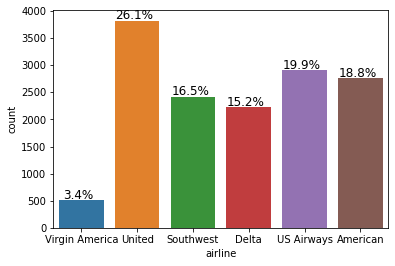

In [25]:
def bar_plot(data, feature): # distribution of tweets. Seaborn countplot.
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(data,'airline', )

As for distribution of tweets, Virgin America has a very low distribution percentage. United has the highest at 26.1%. I believe that size of the airline plays a part in the distribution variance. 

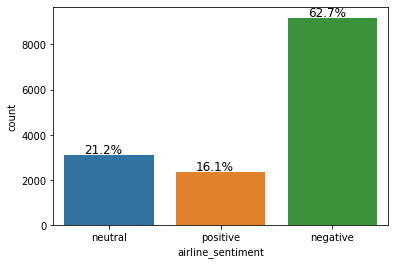

In [26]:
def bar_plot(data, feature): # Pretty standard graph showing the different category of tweets. Since there are more negative tweets, I would assume the model will lean this way. let's confirm. All the models were particularly good at predicting negative sentiment. This can be a conclusion. 
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(data,'airline_sentiment')

It is easy to see that most tweets are overwhelmingly negative. I suspect that this is due to the fact that anyone who gets off a plane and must tweet about it is emotionally engaged by the flight. While positive and neutral sentiment may ebb, a negative result from a flight would elicit enough anger to induce the flyer to tweet about it. 

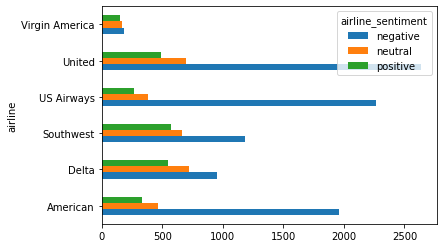

In [27]:
# sentiment for each airline
data.head(1)
data.groupby('airline_sentiment').airline.value_counts().unstack(0).plot.barh()

This chart shows the effect of large airlines on customer sentiment. The largest American airways are American, United, Delta, and Southwest. US Airways merged with American in 2015. I believe this chart shows that larger airlines find new and creative ways to disenfranchise and anger customers, while Virgin America manages to maintain a status quo relationship with it's customers when comparing the variation between positive, negative and neutral tweets. 

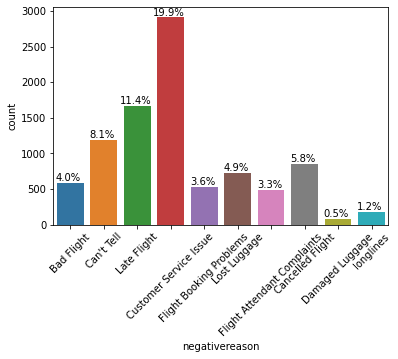

In [28]:
def bar_plot(data, feature):
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=10,
            xytext=(0,5),
            textcoords="offset points")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()
    
bar_plot(data,'negativereason')

This chart is very telling. The overwhelmingly largest reason that causes negative tweets is a late flight. This is a huge annoyance to travelers, causing the traveler to have to attempt to modify their behavior to make up for the percieved failure of the airline. It also is directly against the purpose of air travel, which is speed. A late flight shows an airline failing to deliver on it's most valuable commodity.    

In [29]:
data.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)


In [30]:
Positive_sent = data[data['airline_sentiment']=='positive'] # Green will be good; red bad and I may adjust the negative tweets to look differently by adjusting the features of the wordcloud.
Negative_sent = data[data['airline_sentiment']=='negative']

In [31]:
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('on')
    plt.title(title, fontsize=30)
    plt.show()

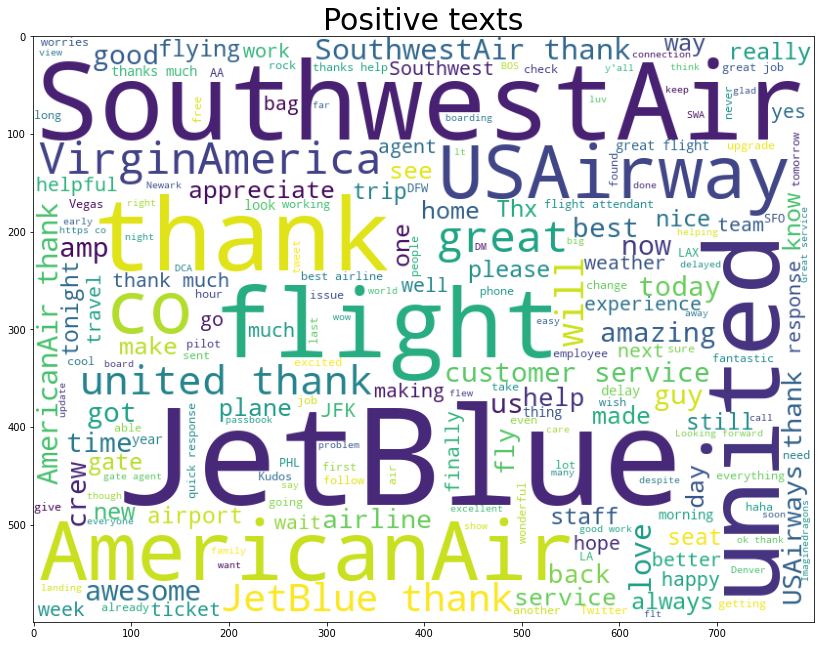

In [32]:
show_wordcloud(Positive_sent, "Positive texts")

This wordcloud has the scale added to it; however, I don't think that the wordcloud gives a measurable comparison to any frequency of word occurance. 

In [33]:
import wordcloud
def show_wordcloud(Negative_sent, title):
    text = ' '.join(Negative_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='pink',
                    colormap= 'flare', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('on')
    plt.title(title, fontsize=30)
    plt.show()

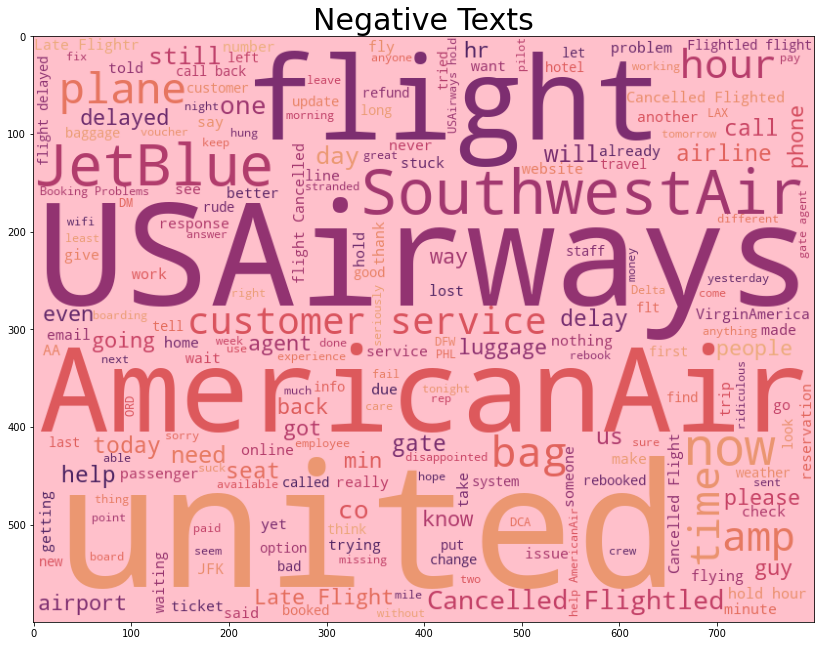

In [34]:
show_wordcloud(Negative_sent, "Negative Texts")

This wordcloud shows the remarkable dominance of United airways in the negative tweets. 

In [35]:
# Now for a bag of words!
cv = CountVectorizer()  
X = cv.fit_transform(data['text'])
print(cv.vocabulary_)
print(X.shape)
print(type(X))
print(X.toarray())

{'virginamerica': 14273, 'what': 14551, 'dhepburn': 4804, 'said': 11646, 'plus': 10438, 'you': 14944, 've': 14193, 'added': 1965, 'commercials': 4030, 'to': 13326, 'the': 13120, 'experience': 5665, 'tacky': 12925, 'didn': 4821, 'today': 13330, 'must': 9234, 'mean': 8837, 'need': 9375, 'take': 12941, 'another': 2331, 'trip': 13509, 'it': 7685, 'really': 11020, 'aggressive': 2054, 'blast': 3070, 'obnoxious': 9726, 'entertainment': 5455, 'in': 7381, 'your': 14953, 'guests': 6733, 'faces': 5740, 'amp': 2263, 'they': 13167, 'have': 6868, 'little': 8392, 'recourse': 11078, 'and': 2281, 'big': 3007, 'bad': 2746, 'thing': 13176, 'about': 1862, 'seriously': 11914, 'would': 14778, 'pay': 10175, '30': 761, 'flight': 6004, 'for': 6157, 'seats': 11832, 'that': 13115, 'this': 13188, 'playing': 10403, 'only': 9836, 'flying': 6101, 'va': 14145, 'yes': 14922, 'nearly': 9371, 'every': 5572, 'time': 13270, 'fly': 6086, 'vx': 14345, 'ear': 5238, 'worm': 14751, 'won': 14715, 'go': 6557, 'away': 2667, 'miss

In [36]:
#vocab=list(data['text']). #This is a huge list of texts and is not useful. The code works, but doesn't help me. 
#vocab

#### 5.	Step: Vectorization
a.	Use CountVectorizer

b. Model and test the model

c. draw a conclusion

In [37]:
# Use CountVectorizer
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # I think it's ok to limit at 2000 features as number of features will increase the processing time.
df_features = bow_vec.fit_transform(df['text'])

df_features = df_features.toarray()

In [38]:
df_features.shape # Make sure the numbers still agree with Row count and features. 

(14640, 2000)

In [39]:
df = df.dropna(subset=['airline_sentiment'])
df['airline_sentiment'] = df['airline_sentiment'].astype('category')
df['airline_sentiment'] = df['airline_sentiment'].cat.codes
df.head() # I dropped all NaN values from airline sentiment. Then I encoded them as category and allowed python to assign numbers. It assigned numbers alphabetically, so 'negative' is 0, 'neutral' is 1, and 'positive is 2.

,airline_sentiment,text
0,1,"['virginamerica', 'what', 'dhepburn', 'said']"
1,2,"['virginamerica', 'plus', 'you', 'have', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']"
2,1,"['virginamerica', 'i', 'did', 'not', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']"
3,0,"['virginamerica', 'it', 'is', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'they', 'have', 'little', 'recourse']"
4,0,"['virginamerica', 'and', 'it', 'is', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']"


Numbers are assigned alphabetically, so 'negative' is 0, 'neutral' is 1, and 'positive' is 2. 

In [40]:
a_s = df['airline_sentiment']
a_s = a_s.astype('int') # I'm pretty sure they were integers already. 

In [41]:
# I'm going to use some standard code Great Learning has shown, but will adjust to my nomenclature. I mus now split data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(df_features, a_s, test_size=0.3, random_state=42)

In [42]:
# Using Random Forest (function called air_forest) to build model for the classification of reviews.
# Also calculating the cross validation score.

air_forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

air_forest = air_forest.fit(X_train, y_train)

print(air_forest)

print(np.mean(cross_val_score(air_forest, df_features, a_s, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7176229508196722


This model falls below the 75% threshold we are targeting I will try to get it over 75% with training.

In [43]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 50)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [44]:
# K-Fold Cross - validation 
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

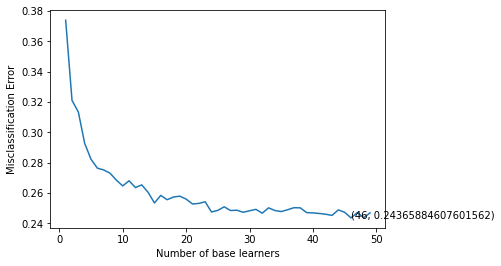

In [45]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator; Perhaps I should have 100 base learners. 
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error. Approximately .245 at 45 learners. I can't tell if this is a local min, but it appears global.
plt.plot(base_ln, error)                                           #Note: Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [46]:
# Training the best model and calculating accuracy on test data; I chose random forest because it's relatively easy to do, and by keeping all my models simple, they can be compared for results. 
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7770947176684881

In [47]:
result =  clf.predict(X_test) 

[[2676   98   40]
 [ 461  376   47]
 [ 238   95  361]]
0.7770947176684881


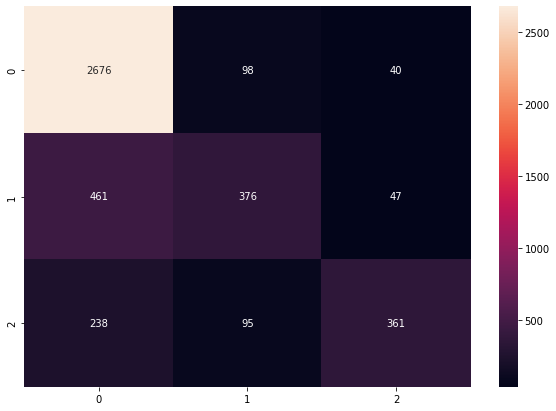

In [48]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes. Note it is a 3x3 matrix.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Text(33.0, 0.5, 'airline_sentiment')

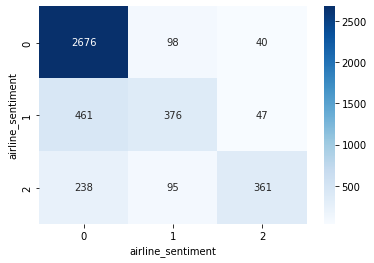

In [49]:
s = sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
s.set_xlabel('airline_sentiment', fontsize=10)
s.set_ylabel('airline_sentiment', fontsize=10) # labeled the X and y axis.

Numbers are assigned alphabetically, so 'negative' is 0, 'neutral' is 1, and 'positive' is 2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


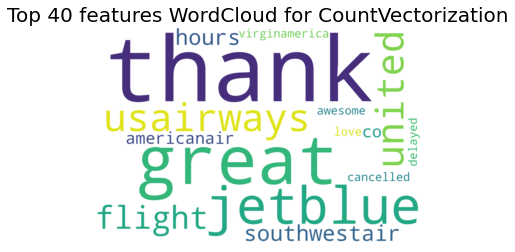

In [50]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer; countvectorizer.
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=3000, 
                          height= 2000).generate(top_features)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(24, 21), frameon='equal')
plt.title('Top 40 features WordCloud for CountVectorization', fontsize=20)
plt.axis("off")
plt.show()

Step 6. TfidfVectorizer
 a. Build a model using TfidfVectorizer

 b. Train the model 

 c. evaluate the model and draw a conclusion. 

In [51]:
# Use TfidfVectorizer
# Using TfidfVectorizer to convert text data to vector. 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
air_df_feat = vectorizer.fit_transform(df['text'])

air_df_feat = air_df_feat.toarray()

air_df_feat.shape

(14640, 2000)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(air_df_feat, a_s, test_size=0.3, random_state=42)

In [53]:
# Using Random Forest (function called air_forest2) to build model for the classification of reviews.
# Also calculating the cross validation score. Note: Countvectorizer was better trained. 

air_forest2 = RandomForestClassifier(n_estimators=10, n_jobs=4)

air_forest2 = air_forest2.fit(X_train, y_train)

print(air_forest2)

print(np.mean(cross_val_score(air_forest2, air_df_feat, a_s, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7168032786885246


In [54]:
# Finding optimal number of base learners using k-fold CV -> # using 50 because it was more than a local minimum in previous work. 
base_ln = [x for x in range(1, 50)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [55]:
# K-Fold Cross - validation # Note: this will be the second model base. 
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

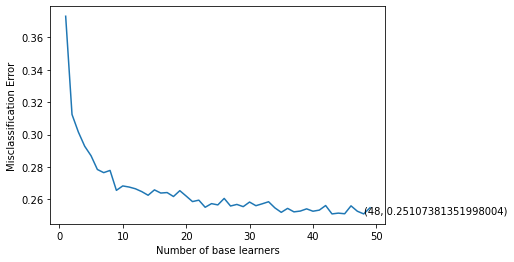

In [56]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show() #I probably should have used 100. That would make the model take forever. 48 is a good possible global minimum.

In [57]:
# Training the best model and calculating accuracy on test data
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # awesome! .77 is greater than 75% of the time. 

0.7720856102003643

In [58]:
result =  clf.predict(X_test) 

[[2690   86   38]
 [ 472  358   54]
 [ 262   89  343]]
0.7720856102003643


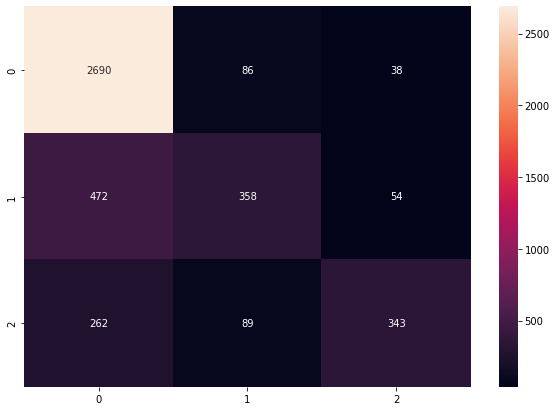

In [59]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Note: the model is strongly weighted to be accurate in assessing negative tweets as negative. 

Text(33.0, 0.5, 'airline_sentiment')

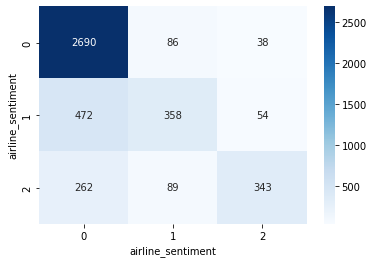

In [60]:
s = sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues') # note: using ailrline_sentiment here because it's more understandable than a_s
s.set_xlabel('airline_sentiment', fontsize=10)
s.set_ylabel('airline_sentiment', fontsize=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


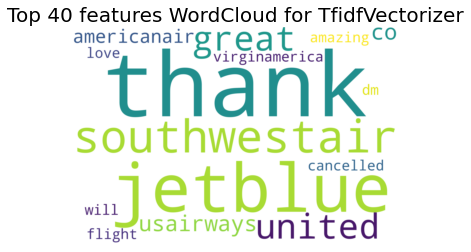

In [61]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 features into top_feature after training the model; seems reasonable. 
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=3000, 
                          height= 2000).generate(top_features)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(24, 21), frameon='equal')
plt.title('Top 40 features WordCloud for TfidfVectorizer', fontsize=20)
plt.axis("off")
plt.show()

After modeling the results of CountVectorizer and TfidfVectorizer, I saw marginal improvements. The result from both models was 77% after training. Perhaps this would be acceptable, but I believe that it can be improved. I want to try to drop all the neutral tweets, and perhaps apply a different modeling technique. Other ideas that may improve results and are simple to implement are to make the model work harder, through increasing feature parameters, and using more entries; this may not be possible after dropping neutral tweets.

Step 7. Dropping neutral tweets. There is a lot of extraneous data in the neutral tweets. This may impact accuracy. 

a. Drop neutral. 

b. Build a model.

c. assess the model on the training data and draw a conclusion. 

In [62]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [63]:
df.head(1)

,airline_sentiment,text
0,1,"['virginamerica', 'what', 'dhepburn', 'said']"


In [64]:
# dropping neutral tweets
df3 = df[df['airline_sentiment'] != 1] # Note: my hypothesis is this will sharply delineate positive and negative sentiment. 0= negative; 2= positive. 

In [65]:
df3.head(20)

,airline_sentiment,text
1,2,"['virginamerica', 'plus', 'you', 'have', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']"
3,0,"['virginamerica', 'it', 'is', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'they', 'have', 'little', 'recourse']"
4,0,"['virginamerica', 'and', 'it', 'is', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']"
5,0,"['virginamerica', 'seriously', 'would', 'pay', 'a', 'flight', 'for', 'seats', 'that', 'did', 'not', 'have', 'this', 'playing', 'it', 'is', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'va']"
6,2,"['virginamerica', 'yes', 'nearly', 'every', 'time', 'i', 'fly', 'vx', 'this', 'ear', 'worm', 'will', 'not', 'go', 'away']"
8,2,"['virginamerica', 'well', 'i', 'did', 'not', 'but', 'now', 'i', 'do', 'd']"
9,2,"['virginamerica', 'it', 'was', 'amazing', 'and', 'arrived', 'an', 'hour', 'early', 'you', 'are', 'too', 'good', 'to', 'me']"
11,2,"['virginamerica', 'i', 'pretty', 'graphics', 'so', 'much', 'better', 'than', 'minimal', 'iconography', 'd']"
12,2,"['virginamerica', 'this', 'is', 'such', 'a', 'great', 'deal', 'already', 'thinking', 'about', 'my', 'nd', 'trip', 'to', 'australia', 'i', 'have', 'not', 'even', 'gone', 'on', 'my', 'st', 'trip', 'yet', 'p']"
13,2,"['virginamerica', 'virginmedia', 'i', 'am', 'flying', 'your', 'fabulous', 'seductive', 'skies', 'again', 'you', 'take', 'all', 'the', 'stress', 'away', 'from', 'travel', 'http', 't', 'co', 'ahlxhhkiyn']"


All Tweets are now either positive (2) or negative (0). 

In [66]:
# Use TfidfVectorizer
# Using TfidfVectorizer to convert text data to vectors.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
air_3 = vectorizer.fit_transform(df3['text'])

air_3 = air_3.toarray()

air_3.shape

(11541, 2000)

In [73]:
a_s3 = df3['airline_sentiment']
a_s3 = a_s3.astype('int') # I'm pretty sure they were integers already. 
a_s3.head()

1    2
3    0
4    0
5    0
6    2
Name: airline_sentiment, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(air_3, a_s3, test_size=0.3, random_state=42)

In [69]:
# Using Random Forest (Now called a_f3) to build model for the classification of reviews.
# Also calculating the cross validation score.

a_f3 = RandomForestClassifier(n_estimators=10, n_jobs=4)

a_f3 = a_f3.fit(X_train, y_train)

print(a_f3)

print(np.mean(cross_val_score(a_f3, air_3, a_s3, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.8682090526457944


In [70]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 50)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [75]:
# K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

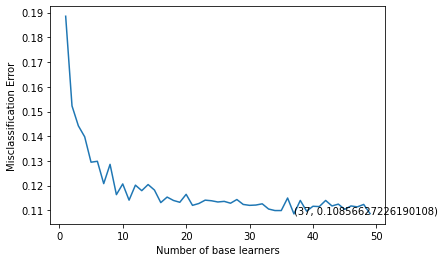

In [78]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [77]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9012416979497545

In [79]:
result =  clf.predict(X_test) 

[[2721   50]
 [ 292  400]]
0.9012416979497545


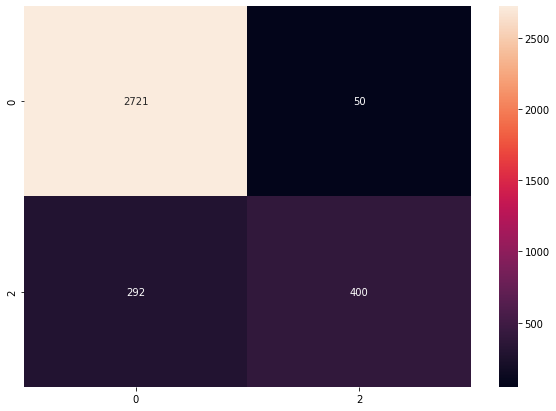

In [80]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "02"],
                  columns = [i for i in "02"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Text(33.0, 0.5, 'airline_sentiment')

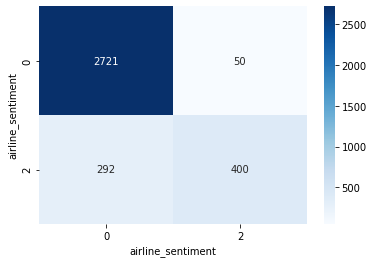

In [81]:
s = sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
s.set_xlabel('airline_sentiment', fontsize=10)
s.set_ylabel('airline_sentiment', fontsize=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


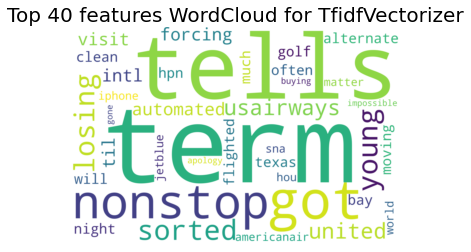

In [82]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=3000, 
                          height= 2000).generate(top_features)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(24, 21), frameon='equal')
plt.title('Top 40 features WordCloud for TfidfVectorizer', fontsize=20)
plt.axis("off")
plt.show()

Summary:

	•	We used a dataset that has 14640 tweets organized in rows with 15 fields of data about each tweet.  
	•	The goal was to build a model for sentiment analysis.
	•	EDA was conducted second to text processing from the original data. 
	•	We pre-processed the data using various techniques Sequence does matter, but a successful data table was achieved. 
	•	We created a multiple Word Cloud plot based on airline_sentiment. 
	•	The pre-processed data is converted to vectors. 
	•	We trained the model and optimized the parameter, which increased the overall accuracy. Generally, our models increased by about 6%. Two of the three went from 71% to 77%. 
	•	Once neutral comments were dropped, the accuracy of the trained and tested model exceeded 90%.
	•	We could apply other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques to increase the overall accuracy even further. However, over 90% is acceptable as a result.

Conclusion:

	•    Once neutral comments were dropped, the accuracy of the trained and tested model exceeded 90%.
	•    The tweet data file trended strongly negative. Strong emotion about the flight may skew the data in this direction.
	•    This was also born out in the result of all three models. The negative tweets were predicted as a majority of the tweets, and the model was most accurate at assessing negative tweets as negative. 
	•    Virgin America had a balanced number of positive and negative tweets. All the larger airlines had strongly negative trends in their tweets. 
	•    Late flights cause the most tweets. 
	•	The final model achieved over 90% accuracy. This would be a useful predictor in the real world.